# Curso: "El lenguaje de programación Python para la docencia en el ámbito científico"

&nbsp;  
<img src="../images/logo_python_letras.png" align="center" style="width:350px;"/>

<strong><div style="text-align: center"> [Mabel Delgado Babiano](https://es.linkedin.com/in/mabeldelgadob)</div></strong>

&nbsp;  
<div style="text-align: center">Heredia, Costa Rica</div>
<div style="text-align: center">4 - 7 Febrero 2019</div>


# Interpolación y ajuste

_La últimas tareas importantes que vamos a ver cómo hacer con SciPy van a ser **interpolar** y **ajustar** una serie de puntos. Son tareas diferentes que aprovecharemos en circunstancias distintas, pero ambas muy útiles. Esta clase está basada en el artículo http://pybonacci.org/2013/08/15/ajuste-e-interpolacion-unidimensionales-basicos-en-python-con-scipy/_

## Dos problemas diferentes

Supongamos que tenemos una serie de puntos que representan los datos de un cierto experimento. Como ejemplo, vamos a cargar los datos de la polar de un avión que están en el archivo `polar.dat`.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Visualizamos el archivo polar.dat
!cat ../data/polar.dat  # Linux / Mac OS X
# !type ../data/polar.dat

# Polar data for a certain airplane
# 1st line: C_L
# 2rd line: C_D

-0.9100  -0.7200  -0.4800  -0.2700  -0.0600   0.1600   0.3100   0.4700   0.6000   0.8200   1.0200   1.2000   1.2400   1.1500   1.0000   0.8000
 0.0538   0.0438   0.0316   0.0245   0.0228   0.0232   0.0262   0.0301   0.0348   0.0461   0.0608   0.0771   0.0814   0.0900   0.0950   0.1000


La primera línea son los datos de $C_L$ y la segunda los datos de $C_D$. Recordamos que había que usar la función `np.loadtxt`, y en este caso no hay que especificar ningún argumento extra más porque ya por defecto detecta que los comentarios empiezan por `#`.

In [6]:
# cargamos los datos
datos = np.loadtxt("../data/polar.dat")
C_L = datos[0]
C_D = datos[1]

Vamos a representar esos datos con cruces azules (pista: usar `mew=2`, "marker edge width 2", para que las cruces se vean mejor):

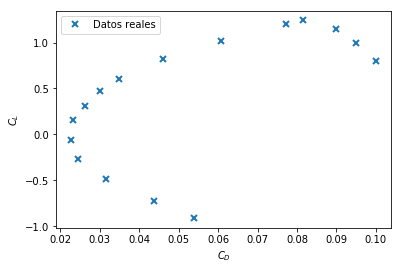

In [7]:
# Representamos los datos
plt.plot(C_D, C_L, 'x', mew=2, label="Datos reales")
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.legend()

Vemos la forma clásica de la polar de un avión. Hallando *el índice* del máximo valor de $C_L$ podemos descartar los datos fuera de la región de entrada en pérdida, y para eso necesitamos la función `np.argmax`:

In [8]:
# Identificamos la región de la pérdida
idx_stall = np.argmax(C_L)
idx_stall

12

In [9]:
# identificamos el CLMAX
C_L[idx_stall]

1.24

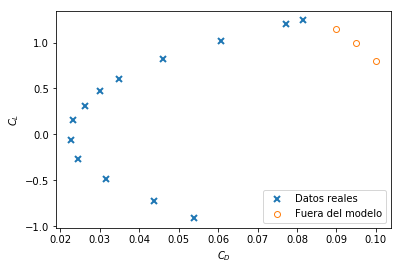

In [10]:
# Representamos los datos dentro y fuera del modelo
plt.plot(C_D[:idx_stall + 1], C_L[:idx_stall + 1], 'x', mew=2, label="Datos reales")
plt.plot(C_D[idx_stall + 1:], C_L[idx_stall + 1:], 'o', mfc='none', label="Fuera del modelo")
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.legend(loc=4)

Hay dos cosas que nos pueden interesar:

* Como *solo tenemos puntos intermedios*, no tenemos posibilidad de evaluar, por ejemplo, $C_L$ para un $C_D$ que no esté en los datos. Si **interpolamos** la curva ya podemos hacerlo.
* Sabemos que, fuera de la región de entrada en pérdida, la polar tiene *forma parabólica*. Si **ajustamos** la curva podemos hallar el $C_{D0}$ y el $k$.

## Interpolación

Para interpolar utilizaremos el paquete `interpolate` de SciPy:

In [11]:
from scipy import interpolate

Vamos a generar unos puntos de ejemplo para explicar cómo funciona. Para eso, vamos a usar simplemente la función $\sin{x}$ en un dominio con pocos puntos:

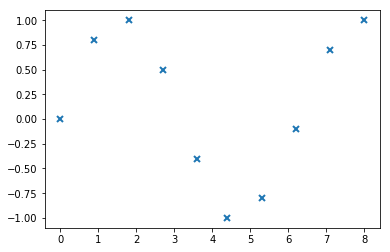

In [12]:
# aeropython: preserve
x_i = [0.0, 0.9, 1.8, 2.7, 3.6, 4.4, 5.3, 6.2, 7.1, 8.0]
y_i = [0.0, 0.8, 1.0, 0.5, -0.4, -1.0, -0.8, -0.1, 0.7, 1.0]
plt.plot(x_i, y_i, 'x', mew=2)

Para crear una **función interpolante** utilizaremos el objeto `InterpolatedUnivariateSpline` del paquete `interpolate`. A este objeto solo hay que pasarle los puntos de interpolación y el grado, y generará un *spline*.

In [13]:
f_interp = interpolate.InterpolatedUnivariateSpline(x_i, y_i, k=1)
f_interp

¿Cómo obtengo los puntos desde aquí? El resultado que hemos obtenido es una *función* y admite como argumento la $x$.

In [14]:
f_interp(np.pi / 2)

array(0.94906585)

Vamos a representar esta función junto con los puntos de interpolación. Fíjate en que, ahora que tenemos una función interpolante, podemos representarla en un dominio:

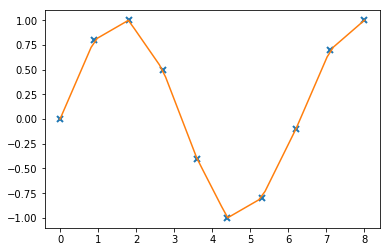

In [15]:
x = np.linspace(0, 8)
y_interp = f_interp(x)

plt.plot(x_i, y_i, 'x', mew=2)
plt.plot(x, y_interp)

Retrocede ahora y comprueba lo que pasa si cambias el grado del *spline*.

##### Ejercicio

Crear una función interpolante $C_D = f(C_L)$ usando splines de grado 2 y representarla. Utiliza solo los datos que resultan de haber eliminado la región de entrada en pérdida. y ten en cuenta que la $x$ y la $y$ para este caso están cambiadas de sitio.

1. Crea un polinomio interpolante usando los valores que encajan en el modelo parabólico.
2. Crea un dominio de $C_L$ entre `C_L.min()` y `C_L.max()`.
3. Halla los valores interpolados de $C_D$ en ese dominio.
4. Representa la función y los puntos.

Text(0,0.5,'$C_L$')

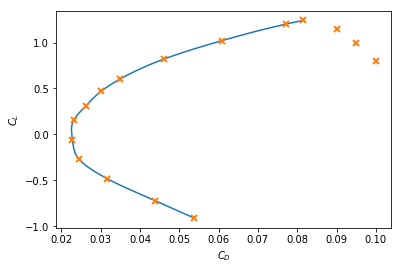

In [17]:
f_C_D = interpolate.InterpolatedUnivariateSpline(C_L[:idx_stall + 1], C_D[:idx_stall + 1], k=2)

C_L_domain = np.linspace(C_L.min(), C_L.max())
C_D_interp = f_C_D(C_L_domain)

plt.plot(C_D_interp, C_L_domain)
plt.plot(C_D, C_L, 'x', mew=2)
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")

## Ajuste

El ajuste funciona de manera totalmente distinta: obtendremos una curva que no tiene por qué pasar por ninguno de los puntos originales, pero que a cambio tendrá una expresión analítica simple.

In [18]:
from scipy.optimize import curve_fit

Vamos otra vez a generar unos datos para ver cómo funcionaría, del tipo:

$$y(x) = x^2 - x + 1 + \text{Ruido}$$

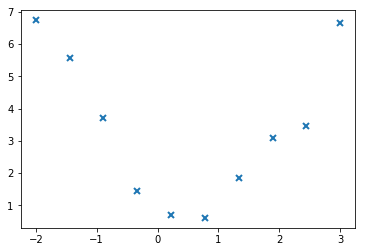

In [19]:
# aeropython: preserve
x_i = np.linspace(-2, 3, num=10)
y_i = x_i ** 2 - x_i + 1 + 0.5 * np.random.randn(10)
plt.plot(x_i, y_i, 'x', mew=2)

Vamos a utilizar la función `polynomial.polyfit`, que recibe los puntos de interpolación y el grado del polinomio. El resultado serán los coeficientes del mismo, **en orden de potencias crecientes**.

In [20]:
def poldeg2(x, a, b, c):
    return a * x**2 + b * x + c

In [21]:
val, cov = curve_fit(poldeg2, x_i, y_i)
a, b, c= val

print(a, b, c)

0.9403370278008155 -1.131916109703747 1.3123583484935244


¡Muy similares a lo que esperábamos!

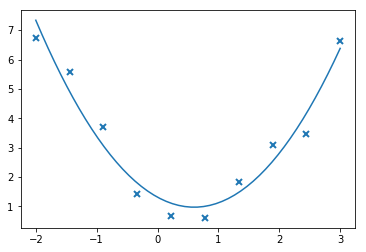

In [22]:
x = np.linspace(-2, 3)

y_fit = poldeg2(x, a, b, c)

l, = plt.plot(x, y_fit)
plt.plot(x_i, y_i, 'x', mew=2, c=l.get_color())

##### Ejercicio

Si modelizamos la polar como:

$$C_D = C_{D0} + k C_L^2$$

hallar los coeficientes $C_{D0}$ y $k$.

In [23]:
def model(x, A, C):
    return A*x**2 + C

In [24]:
C_L
C_D

array([0.0538, 0.0438, 0.0316, 0.0245, 0.0228, 0.0232, 0.0262, 0.0301,
       0.0348, 0.0461, 0.0608, 0.0771, 0.0814, 0.09  , 0.095 , 0.1   ])

In [25]:
popt, _ = curve_fit(model, C_L[:idx_stall+1], C_D[:idx_stall+1])

In [26]:
A, B = popt

In [27]:
x = np.linspace(-1.5, 1.5, 50)
y = model(x, A, B)

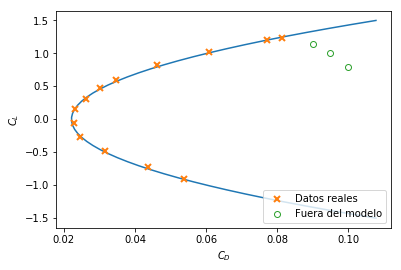

In [28]:
plt.plot(y, x)
plt.plot(C_D[:idx_stall + 1], C_L[:idx_stall + 1], 'x', mew=2, label="Datos reales")
plt.plot(C_D[idx_stall + 1:], C_L[idx_stall + 1:], 'o', mfc='none', label="Fuera del modelo")
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.legend(loc=4)

--- 

__Referencias__

Material adaptado del "Curso AeroPython". AeroPython. https://github.com/AeroPython/Curso_AeroPython<br>

 <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [16]:
# preserve
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/style.css'
HTML(open(css_file, "r").read())